# TASK1

In [1]:
%matplotlib inline

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd
import scipy.signal

# suppress division by zero warning
from warnings import simplefilter
simplefilter('ignore', RuntimeWarning)

PI2 = 2 * np.pi

Создадим волну треугольного сигнала:

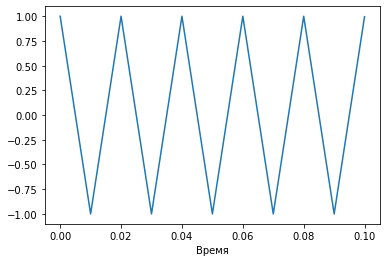

In [4]:
in_wave = thinkdsp.TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
thinkplot.config(xlabel='Время')

diff треугольной волны - это прямоугольная волна, что объясняет, почему гармоники в прямоугольной волне уменьшаются как  1/𝑓 , по сравнению с треугольной волной, которая спадает как  1/𝑓2 .

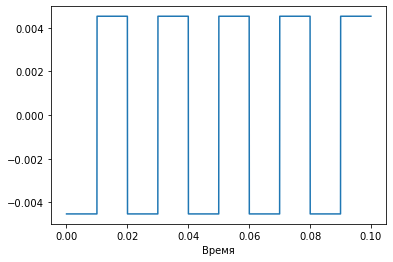

In [6]:
out_wave = in_wave.diff()
out_wave.plot()
thinkplot.config(xlabel='Время')

Когда мы берём спектральную производную, мы получаем "звон" вокруг разрывов.

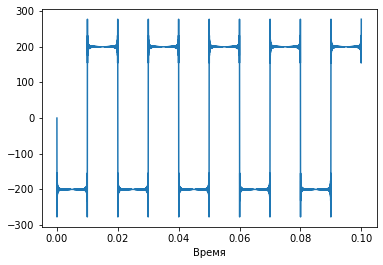

In [9]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Время')

С математической точки зрения проблема в том, что производная треугольной волны не определена в точках треугольника.

# TASK2

Создадим волну прямоугольного сигнала:

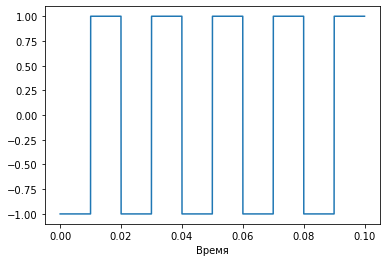

In [12]:
in_wave = thinkdsp.SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
thinkplot.config(xlabel='Время')

Совокупная сумма прямоугольной волны - это треугольная волна.

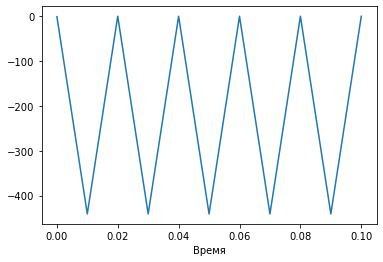

In [14]:
out_wave = in_wave.cumsum()
out_wave.plot()
thinkplot.config(xlabel='Время')

Спектральный интеграл также представляет собой треугольную волну, несмотря на то что амплитуда сильно отличается.

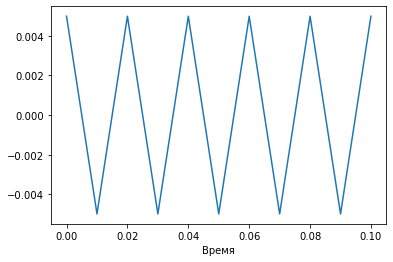

In [15]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Время')

Если уравновесить и нормализовать две волны, они будут визуально похожи.

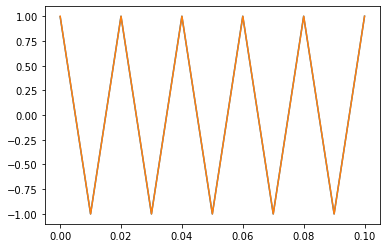

In [16]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

Численно они также имеют сходство:

In [17]:
max(abs(out_wave.ys - out_wave2.ys))

0.0045351473922902175

# TASK3

Создадим волну пилообразного сигнала:

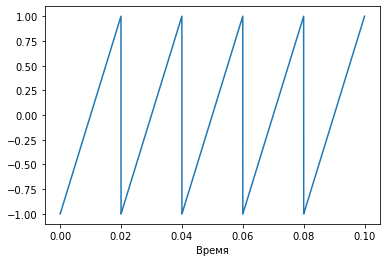

In [19]:
in_wave = thinkdsp.SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
thinkplot.config(xlabel='Время')

Первая совокупная сумма зубца пилы - это результат квадратичной функции на графике:

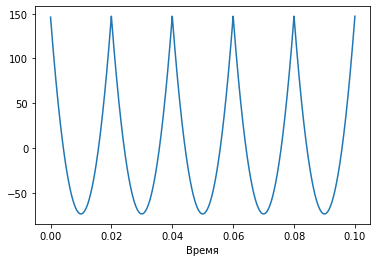

In [20]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
thinkplot.config(xlabel='Время')

Вторая совокупная сумма - это кубическая кривая:

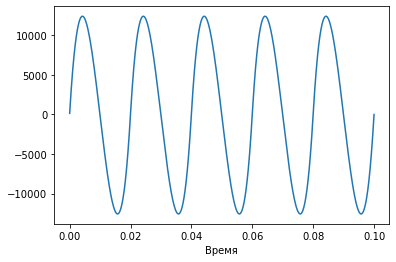

In [21]:
out_wave = out_wave.cumsum()
out_wave.plot()
thinkplot.config(xlabel='Время')

Двойное интегрирование также дает кубическую кривую.

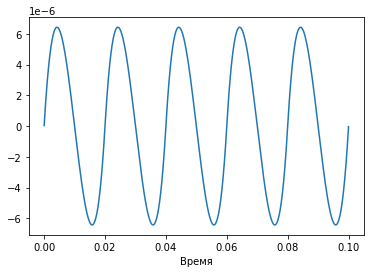

In [23]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Время')

На этом этапе результат всё больше и больше напоминает синусоиду. Причина в том, что интеграция действует как фильтр нижних частот. На данный момент мы отфильтровали почти все, кроме основного, как показано в спектре ниже:

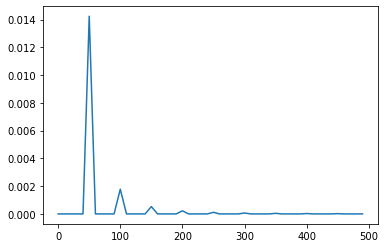

In [25]:
out_wave2.make_spectrum().plot(high=500)

# TASK4

Создадим волну кубического сигнала:

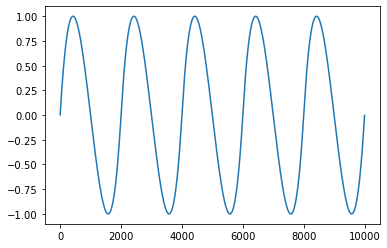

In [26]:
in_wave = thinkdsp.CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

Первая разность - парабола, вторая - пилообразная волна:

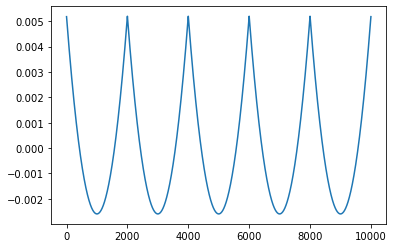

In [27]:
out_wave = in_wave.diff()
out_wave.plot()

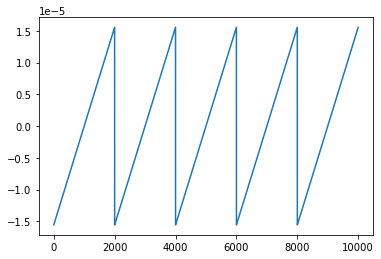

In [28]:
out_wave = out_wave.diff()
out_wave.plot()

Когда мы дифференцируем дважды, получаем пилообразную форму с некоторым звоном. Проблема в том, что производная параболического сигнала в точках не определена.

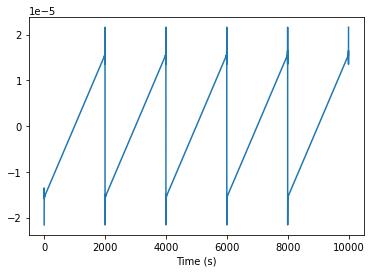

In [29]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

Окно второй разности -1, 2, -1. Вычисляя DFT окна, мы можем найти соответствующий фильтр.

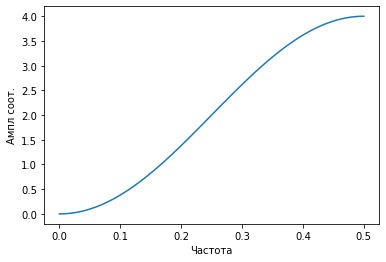

In [31]:
diff_window = np.array([-1.0, 2.0, -1.0])
padded = thinkdsp.zero_pad(diff_window, len(in_wave))
diff_wave = thinkdsp.Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot()
thinkplot.config(xlabel='Частота', ylabel='Ампл соот.')

А для второй производной мы можем найти соответствующий фильтр, вычислив фильтр первой производной и возведя его в квадрат.

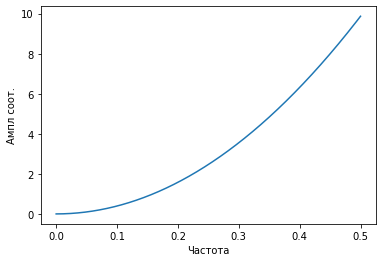

In [33]:
deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot()

thinkplot.config(xlabel='Частота', ylabel='Ампл соот.')

Сравним полученные функции в одной системе:

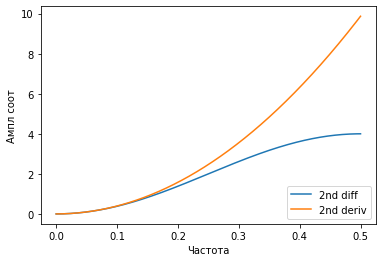

In [34]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')
thinkplot.config(xlabel='Частота', ylabel='Ампл соот', loc='lower right')

Оба являются фильтрами высоких частот, которые усиливают компоненты самых высоких частот. Вторая производная параболическая, поэтому она сильнее всего усиливает самые высокие частоты. Вторая разница - хорошее приближение второй производной только на самых низких частотах, затем она существенно отклоняется.